In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from sklearn.preprocessing import normalize
from scipy.stats import norm
np.set_printoptions(threshold=np.nan)
import pandas as pd
from matplotlib.ticker import MaxNLocator
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

# Q1 -Bernoulli Random Variables

# Matlab Code - Q1
function Matrix = Bernoulli(p,M,N)

    Matrix = rand(M,N) < p;
    end

In [2]:
def Bernoulli(p,M,N):
    Matrix = (np.random.rand(M,N) < p).astype(int)
    return Matrix

In [3]:
print('p = 0.5\n',Bernoulli(0.5,1,10))
print('p = 0.9\n',Bernoulli(0.9,1,10))

p = 0.5
 [[0 0 0 0 0 0 0 1 0 1]]
p = 0.9
 [[1 1 1 1 1 1 1 1 1 0]]


# As it shows above, the simulation might not perfect to catch Bernoulli random variables at certain probabilities, but in long run, it should catch the Bernoulli random variables in terms of the distribution of outcome estimations. Show as below:

<IPython.core.display.Javascript object>


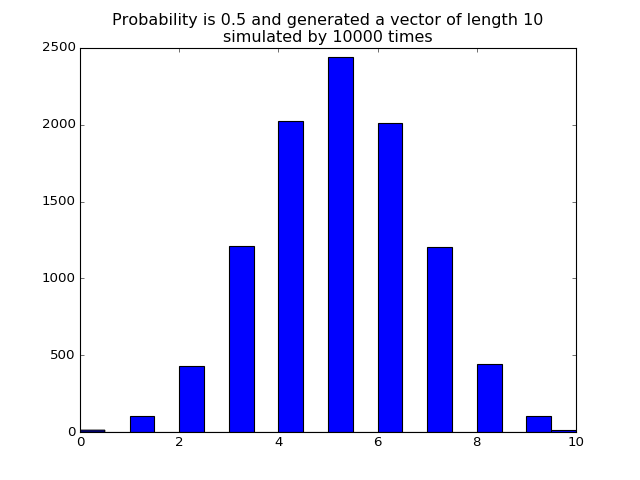

<IPython.core.display.Javascript object>


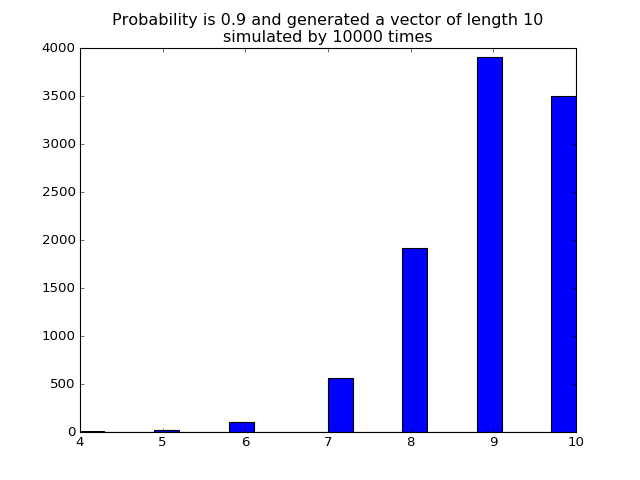

In [30]:
Calculated_Bernolli_probability=[]
for i in range(10000):
    Calculated_Bernolli_probability.append(sum(Bernoulli(0.5,1,10)[0]))
plt.figure()
_=plt.hist(Calculated_Bernolli_probability,bins=20)
plt.title('Probability is 0.5 and generated a vector of length 10\nsimulated by 10000 times')

Calculated_Bernolli_probability=[]
for i in range(10000):
    Calculated_Bernolli_probability.append(sum(Bernoulli(0.9,1,10)[0]))
plt.figure()
_=plt.hist(Calculated_Bernolli_probability,bins=20)
plt.title('Probability is 0.9 and generated a vector of length 10\nsimulated by 10000 times')

# Q2A -probability of a Hit, the probability of a Miss

# Matlab Code -Q2A
function [pHit, pMiss, pFA, pCR] = SDT(dp,c)
     
    % dp = d prime, the sample differences
    % c = subjective judgement
    % pHit = yes and signal
    % pMiss = no and signal
    % pFA = yes and no signal
    % pCR = correct rejection = no and no signal
    close all;clc

    NoiseMean = 0;
    SignalMean = NoiseMean + dp;

    variance = rand(1) * dp;



    if c < NoiseMean - 3 * sqrt(variance) || c > SignalMean + 3 * sqrt(variance)
    fprintf('please put in a reasonable value for criterion\n')
    else
    x = linspace(NoiseMean - 2*dp,SignalMean + 2*dp,100000);
    noiseCDF = normcdf(x,NoiseMean,variance);
    signalCDF = normcdf(x,SignalMean,variance);
    
    noisePDF = diff(noiseCDF) ./ diff(x);
    signalPDF = diff(signalCDF) ./ diff(x);
    
    
    figure;
    plot(x(2:end),noisePDF,'b');hold on
    plot(x(2:end),signalPDF,'r')
    xlabel('Internal Response')
    ylabel('Prabability')
    
    ylim = get(gca,'YLim');
    plot(c*[1,1],[0,ylim(2)*1.1],'k-')
    
    legend('noise', 'signal + noise', 'criterion')
    
    
    ylim = get(gca,'YLim');
    plot(NoiseMean*[1,1], ylim,'b:')
    plot(SignalMean*[1,1],ylim,'r:')
    
    
    
    CR = noiseCDF(x<=c) ;
    Hit = signalCDF(x>c) ;
    Miss = signalCDF(x<=c) ;
    FA = noiseCDF(x>c);
    pCR = CR(end) ;
    pHit = Hit(1) ;
    pMiss = 1-pHit ;
    pFA = 1-pCR;
    sentence = 'd prime = %.2f\tcriterion = %.1f\n';
    fprintf(sentence,dp,c)
    sentence = 'p(Hit)\t = %.4f\np(Miss)\t = %.4f\np(False Alarm)\t = %.4f\np(Correct rejection) = %.4f\n';
    fprintf(sentence,pHit,pMiss,pFA,pCR)
    
    text(-1.5,max(noisePDF),sprintf(sentence,pHit,pMiss,pFA,pCR))
    end

In [5]:
def SDT(dp,c):
    NoiseMean = 0
    SignalMean = NoiseMean + dp
    if c == 0:
        variance= np.random.rand(1)*2
    else:
        variance = np.random.rand(1) * dp
   
    
    if c < NoiseMean - 3*np.sqrt(variance) or c > SignalMean + 3 * np.sqrt(variance):
        print('please put in a reasonable value for criterion')
        return None
    if dp == 0:
        x = np.linspace(-3,3,100000)
    else:
        x = np.linspace(NoiseMean-2*dp,SignalMean+2*dp,100000)
    noiseCDF = norm.cdf(x,NoiseMean,variance)
    signalCDF = norm.cdf(x,SignalMean,variance)
    
    noisePDF = np.diff(noiseCDF) / np.diff(x)
    signalPDF = np.diff(signalCDF) / np.diff(x)
    
    fig=plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(x[1:],noisePDF,'b',label='noise')
    ax.plot(x[1:],signalPDF,'r',label='signal')
    ax.axvline(c, color='black', lw=2,label='criterion')
    plt.legend()
    plt.xlabel('Internal Response')
    plt.ylabel('Probability')
    
    ax.axvline(NoiseMean,ls=':')
    ax.axvline(SignalMean,ls=':')
    CR = noiseCDF[x<=c] ;
    Hit = signalCDF[x>c] ;
    Miss = signalCDF[x<=c] ;
    FA = noiseCDF[x>c];
    pCR = CR[-1] ;
    pHit = Hit[0] ;
    pMiss = 1-pHit ;
    pFA = 1-pCR;
    sentence ='p(Hit) = %.4f\np(Miss) = %.4f\np(False Alarm) = %.4f\np(Correct rejection) = %.4f\n'%(pHit,pMiss,pFA,pCR)
    #print('p(Hit) = %.4f\np(Miss) = %.4f\np(False Alarm) = %.4f\np(Correct rejection) = %.4f\n' %(pHit,pMiss,pFA,pCR))
    ax.text(-1.5,max(noisePDF)*.7,sentence)
    plt.title('d prime is %1.1f,criterion is %1.1f' % (dp,c))
    return pHit, pMiss, pFA, pCR


# Q2A Discussion

By simulating Signal Detection Theory by its two parameters: d prime and criterion, it shows as below for different parameters:  d=0, c=0, d=1, c=0.5, d=1,c=1

After I generate CDFs of the signal(N(0+d prim, variance)) and noise(N(0,variance)), I find the y-axis value of the CDFs of signal and noise when the x-axis value is c(i.e.0,0.5,1). The two data points of on the CDFs when they locate between the x-axis value is c are the values for p(Hit),p(Miss),p(FA),p(CR) correspondingly. 

One thing I should point out is that I did not use function of pdf to generate the PDFs from CDFs, but I use the limit formula to calculate the limit of each point of the CDFs to generate the PDFs. 

When d=0,c=0, because signal and noise are so close (zero distance), there is no way to tell signal from noise mathematically. However, criterion serves as decision making criterion to decide whether to respond or not. Such extreme case make the calculation of p(Hit), p(Miss), p(FA), and p(CR) as the area under the curve and between the criterion. These areas are either 0.5 or 0 depends on how we view the state when the response happens: on the left of criterion, when responding 'yes', and we view the area belongs to signal, such response is 'Hit'; while we view the area belongs to noise, such response is 'FA'. If we count this type of confusion consistently, we end up with 0.5 or 0 to be the probability. Same to other cases. 


When d=1, c=0.5, the responses happen almost at the middle between signal and noise (my variance is random, thus the responses do not nessary to be the exact mid point). The ratio of hit:miss:FA:CR should be almost 3:1:3:1. And in the simulation showed, it is almost the case. 

When d=1,c=1, the ratio between hit and miss should be 1:1 because the criterion falls at the mid point of signal's distibution. Therefore, the chance to respond or not respond given that there is a signal is 0.5 and 0.5. On the other hand, since criterion is relatively high, the decision making is relatively conservative. Therefore, it results of that more correct rejections than false alarm, because decision makers would rather not to respond when given a signal but also when given a noise. 

<IPython.core.display.Javascript object>


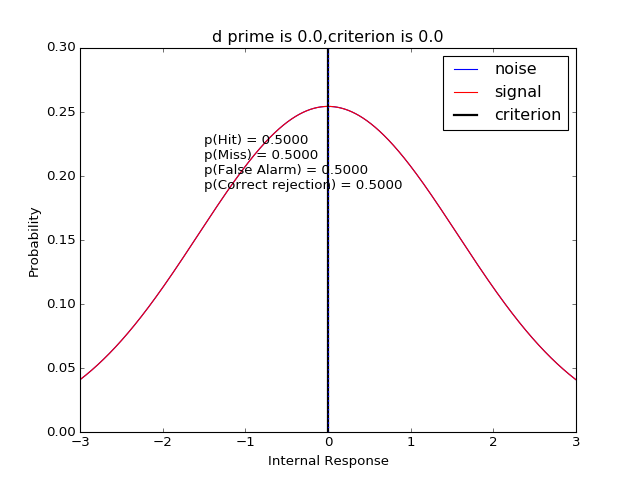

When d=0,c=0, because signal and noise are so close (zero distance), there is no way to tell signal from noise mathematically. However, criterion serves as decision making criterion to decide whether to respond or not. Such extreme case make the calculation of p(Hit), p(Miss), p(FA), and p(CR) as the area under the curve and between the criterion. These areas are either 0.5 or 0 depends on how we view the state when the response happens: on the left of criterion, when responding 'yes', and we view the area belongs to signal, such response is 'Hit'; while we view the area belongs to noise, such response is 'FA'. If we count this type of confusion consistently, we end up with 0.5 or 0 to be the probability. Same to other cases.


<IPython.core.display.Javascript object>


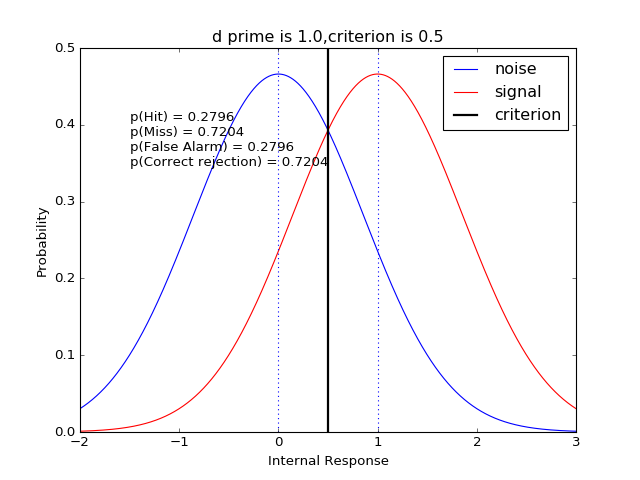

When d=1, c=0.5, the responses happen almost at the middle between signal and noise (my variance is random, thus the responses do not nessary to be the exact mid point). The ratio of hit:miss:FA:CR should be almost 3:1:3:1. And in the simulation showed, it is almost the case.


<IPython.core.display.Javascript object>


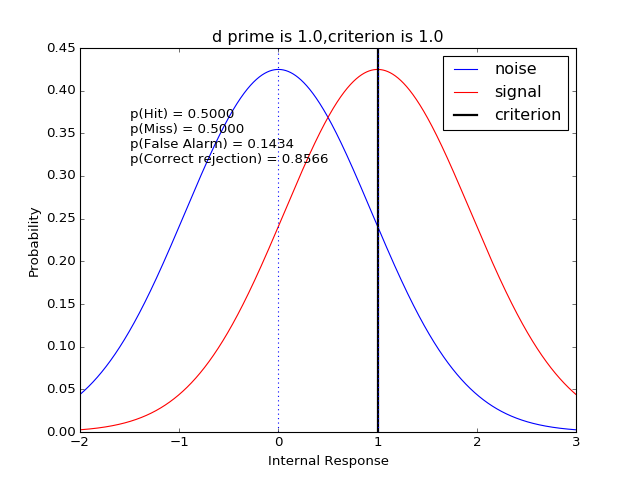

When d=1,c=1, the ratio between hit and miss should be 1:1 because the criterion falls at the mid point of signal's distibution. Therefore, the chance to respond or not respond given that there is a signal is 0.5 and 0.5. On the other hand, since criterion is relatively high, the decision making is relatively conservative. Therefore, it results of that more correct rejections than false alarm, because decision makers would rather not to respond when given a signal but also when given a noise. 


In [32]:
pHit, pMiss, pFA, pCR=SDT(0,0)
print("When d=0,c=0, because signal and noise are so close (zero distance), there is no way to tell signal from noise mathematically. However, criterion serves as decision making criterion to decide whether to respond or not. Such extreme case make the calculation of p(Hit), p(Miss), p(FA), and p(CR) as the area under the curve and between the criterion. These areas are either 0.5 or 0 depends on how we view the state when the response happens: on the left of criterion, when responding 'yes', and we view the area belongs to signal, such response is 'Hit'; while we view the area belongs to noise, such response is 'FA'. If we count this type of confusion consistently, we end up with 0.5 or 0 to be the probability. Same to other cases.")
pHit, pMiss, pFA, pCR=SDT(1,0.5)
print("When d=1, c=0.5, the responses happen almost at the middle between signal and noise (my variance is random, thus the responses do not nessary to be the exact mid point). The ratio of hit:miss:FA:CR should be almost 3:1:3:1. And in the simulation showed, it is almost the case.")
pHit, pMiss, pFA, pCR=SDT(1,1)
print("When d=1,c=1, the ratio between hit and miss should be 1:1 because the criterion falls at the mid point of signal's distibution. Therefore, the chance to respond or not respond given that there is a signal is 0.5 and 0.5. On the other hand, since criterion is relatively high, the decision making is relatively conservative. Therefore, it results of that more correct rejections than false alarm, because decision makers would rather not to respond when given a signal but also when given a noise. ")

# Q2B -  simulates the outcome of a signal detection experiment 

# Matlab Code - Q2B
function [pHit, pMiss, pFA, pCR] = SDTgen(dp,c,nSignal,nNoSignal)

     % dp = d prime, the sample differences
     % c = subjective judgement
     % nSN = # of signal + noise
     % nN = # of noise
     % pHit = yes and signal
     % pMiss = no and signal
     % pFA = yes and no signal
     % pCR = correct rejection = no and no signal
 close all;clc

    NoiseMean = 0;
    SignalMean = NoiseMean + dp;

    variance = 1+ rand(1) * dp;

    if c < NoiseMean - 3 * sqrt(variance) || c > SignalMean + 3 * sqrt(variance)
        fprintf('please put in a reasonable value for criterion\n')
    else
    
    xSignal = linspace(NoiseMean - 3*dp,SignalMean + 3*dp,nSignal);
    xNoise = linspace(NoiseMean - 3*dp,SignalMean + 3*dp,nNoSignal);
    
    noiseCDF = normcdf(xNoise,NoiseMean,variance);
    signalCDF = normcdf(xSignal,SignalMean,variance);
    
    noisePDF = diff(noiseCDF) ./ diff(xNoise);
    signalPDF = diff(signalCDF) ./ diff(xSignal);
    
    figure;
    plot(xNoise(2:end),noisePDF,'b');hold on
    plot(xSignal(2:end),signalPDF,'r')
    xlabel('Internal Response')
    ylabel('Prabability')
    
    ylim = get(gca,'YLim');
    plot(c*[1,1],[0,ylim(2)*1.1],'k-')
    
    legend('noise', 'signal + noise', 'criterion')
    
    
    ylim = get(gca,'YLim');
    plot(NoiseMean*[1,1], ylim,'b:')
    plot(SignalMean*[1,1],ylim,'r:')
    
    XX = datasample([NoiseMean,SignalMean],(nSignal+nNoSignal),'Weights',[nNoSignal,nSignal]/(nSignal+nNoSignal));
    
    stim = Shuffle(XX);
    resp = zeros(1,(nSignal+nNoSignal));
    for i = 1:(nSignal+nNoSignal)
        if stim(i) == NoiseMean % noise trial
            internalResponse = randn(1)*sqrt(variance) + NoiseMean;
        else
            internalResponse = randn(1)*sqrt(variance) + SignalMean;
        end
        resp(i) = internalResponse > c;
    end
    
    nCR = sum(resp==0 & stim == NoiseMean);
    nHit = sum(resp == 1 & stim == SignalMean);
    nMiss = sum(resp == 0 & stim == SignalMean);
    nFA = sum(resp == 1 & stim == NoiseMean);
    sentence = 'd prime = %.2f\tcriterion = %.1f\n';
    fprintf(sentence,dp,c)
    sentence = 'n(Hit)\t = %d\nn(Miss)\t = %d\nn(False Alarm)\t = %d\nn(Correct rejection) = %d\n';
    fprintf(sentence,nHit,nMiss,nFA,nCR)
    
    text(-1.5,max(noisePDF),sprintf(sentence,nHit,nMiss,nFA,nCR))
end



In [7]:
def SDTgen(dp,c,nSignal,nNoSignal,flag=1):
    NoiseMean = 0
    SignalMean = NoiseMean + dp
    variance = 1+ np.random.rand(1) * dp
    nTrials = nSignal+nNoSignal
    
    if c < NoiseMean - 3*np.sqrt(variance) or c > SignalMean + 3 * np.sqrt(variance):
        print('please put in a reasonable value for criterion')
        return None
    xSignal = np.linspace(NoiseMean-3*dp,SignalMean+3*dp,nSignal)
    xNoise = np.linspace(NoiseMean-3*dp,SignalMean+3*dp,nNoSignal)

    noiseCDF = norm.cdf(xNoise,NoiseMean,variance)
    signalCDF = norm.cdf(xSignal,SignalMean,variance)
    
    noisePDF = np.diff(noiseCDF) / np.diff(xNoise)
    signalPDF = np.diff(signalCDF) / np.diff(xSignal)
    if flag == 1:
        fig=plt.figure()
        ax = fig.add_subplot(1,1,1)
        ax.plot(xNoise[1:],noisePDF,'b',label='noise')
        ax.plot(xSignal[1:],signalPDF,'r',label='signal')
        ax.axvline(c, color='black', lw=2,label='criterion')
        plt.legend()
        plt.xlabel('Internal Response')
        plt.ylabel('Probability')
    
        ax.axvline(NoiseMean,ls=':')
        ax.axvline(SignalMean,ls=':')
    
    xx=Bernoulli(0.5,nTrials,1)
    stim = xx.reshape(1,nTrials)
    resp = []
    
    for i in range(nTrials):
        if stim[0][i] == NoiseMean:
            internalResponse = np.random.randn(1) * np.sqrt(variance) + NoiseMean
        else:
            internalResponse = np.random.randn(1) * np.sqrt(variance) + SignalMean
        resp.append((internalResponse > c).astype(int))
    resp=np.array(resp).reshape(1,nTrials)
    Hit_Signal=[];Hit_Noise=[];Miss_Signal=[];Miss_Noise=[]
    for i in range(len(resp[0])):
        #print(resp[0][i],stim[0][i])
        if resp[0][i]==1 and stim[0][i]==1:
            Hit_Signal.append(1)
        elif resp[0][i]==1 and stim[0][i]==0:
            Hit_Noise.append(1)
        elif resp[0][i] ==0 and stim[0][i]==1:
            Miss_Signal.append(1)
        elif resp[0][i] == 0 and stim[0][i]==0:
            Miss_Noise.append(1)
        
    nHit=len(Hit_Signal);nMiss=len(Miss_Signal);nFA=len(Hit_Noise);nCR=len(Miss_Noise)
    
    sentence ='n(Hit) = %d\nn(Miss) = %d\nn(False Alarm) = %d\nn(Correct rejection) = %d\n'%(nHit,nMiss,nFA,nCR)
    if flag == 1:
        ax.text(-1.5,max(noisePDF)*.7,sentence)
        plt.title('d prime is %1.2f,criterion is %1.2f,number of signals is %d,number of noise is %d' % (dp,c,nSignal,nNoSignal))
    return nHit, nMiss, nFA, nCR

# Q2B Discussion

Like the third case discussed above, d=1 and c=1, the ratio between hit and miss should be 1:1 because the criterion falls at the mid point of signal's distibution. Therefore, the chance to respond or not respond given that there is a signal is 0.5 and 0.5. On the other hand, since criterion is relatively high, the decision making is relatively conservative. Therefore, it results of that more correct rejections than false alarm, because decision makers would rather not to respond when given a signal but also when given a noise. The approximate ratio among hit, miss, FA, and CR should be 1:1:4:1

<IPython.core.display.Javascript object>


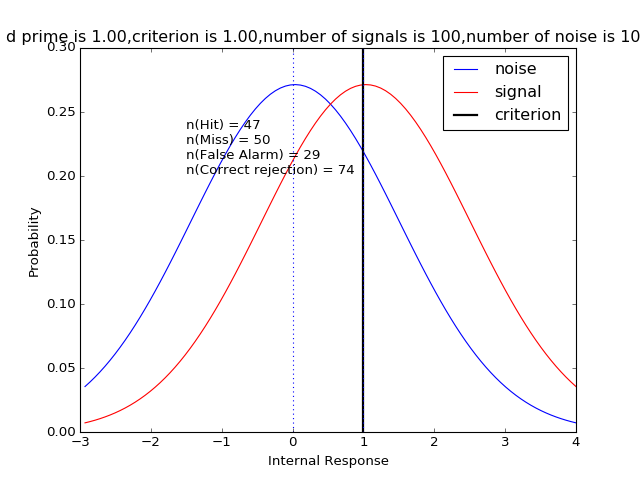

<IPython.core.display.Javascript object>


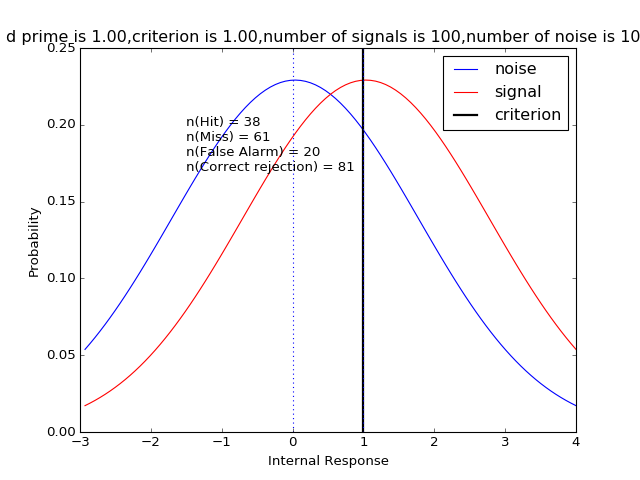

<IPython.core.display.Javascript object>


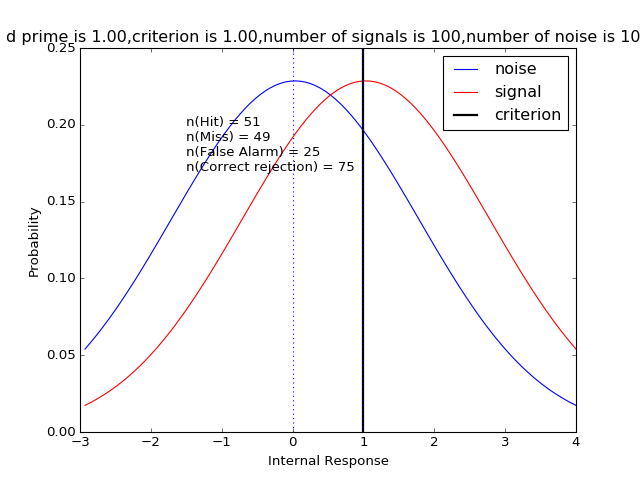

<IPython.core.display.Javascript object>


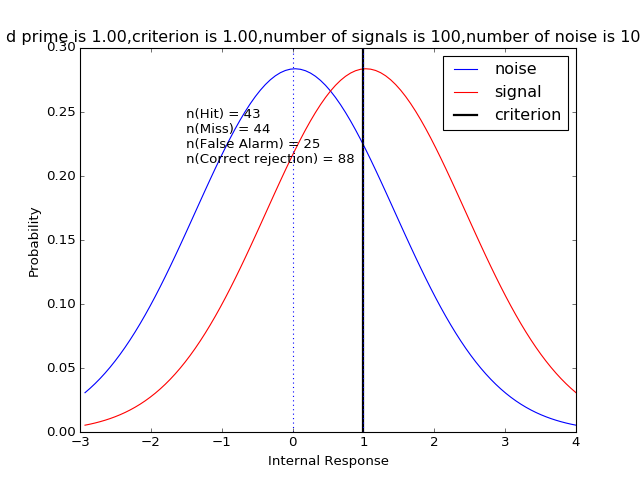

In [33]:
nHit, nMiss, nFA, nCR=SDTgen(1,1,100,100)
nHit, nMiss, nFA, nCR=SDTgen(1,1,100,100)
nHit, nMiss, nFA, nCR=SDTgen(1,1,100,100)
nHit, nMiss, nFA, nCR=SDTgen(1,1,100,100)

# Q3 - Use your simulator to guesstimate what d’, c must be to get about [200 100; 100 200]. 

# Q3 - Discussion 1 - There will be another discussion after the for loop simulation

To manipulate d' and c to get about [200,100; 100, 200] (Hit, Miss; FA, CR), number of signal and number of noise + signal must be 300 data points. 

# Matlab Code - Q3

    d = 0:0.01:2;
    c = -2:0.01:3;
    cnt = 1;
    for i = 1:length(d)
    for j = 1:length(c)
        [nHit(i,j), nMiss(i,j), nFA(i,j), nCR(i,j)] = SDTgen(d(i),c(j),300,300,0);
        %cnt = cnt + 1;
        close all
    end
    end


    target = [200 100 100 200];
    GenData(:,:,1) = nHit;
    GenData(:,:,2) = nMiss;
    GenData(:,:,3) = nFA;
    GenData(:,:,4) = nCR;
    for i =1:4
    p(:,:,1) =  GenData(:,:,i) - target(i) .* ones(size(GenData(:,:,i)));
    end

    [D,C] = meshgrid(d,c);
    D = D';
    C = C';
    sumdistance = sum(abs(p),3);

    mesh(D,C,sumdistance);colormap('jet')

    mini_idx = find(sumdistance == min(min(sumdistance)));


    for i = 1:length(mini_idx)
    [inHit(i), inMiss(i), inFA(i), inCR(i)] = SDTgen(D(mini_idx(i)),C(mini_idx(i)),300,300,1);
    end
    fprintf('optimal d prime is %1.3f, and optimal c prime is %1.3f to get what we need\n',D(mini_idx(i)),C(mini_idx(i)))

In [9]:
c = np.arange(start=-2,stop=3,step = 0.01);d = np.arange(start=0,stop=2,step=0.01);D,C = np.meshgrid(d,c)
GemStore=[];target = [200,100,100,200];distance=[]
for cs in c:
    for ds in d:
        nHit, nMiss, nFA, nCR=SDTgen(ds,cs,300,300,flag = 0)
        plt.close()
    
        temp = np.array([nHit, nMiss,nFA,nCR])
        GemStore.append(np.copy(temp))

In [11]:
for element in GemStore:
    distance.append(element - target)
distance = pd.DataFrame(distance,columns=['nHit','nMiss','nFA','nCR ']).astype(object) 
distance = abs(distance)
distance['sum']=distance.sum(axis=1)
idxminimun = distance['sum'].idxmin()

<IPython.core.display.Javascript object>


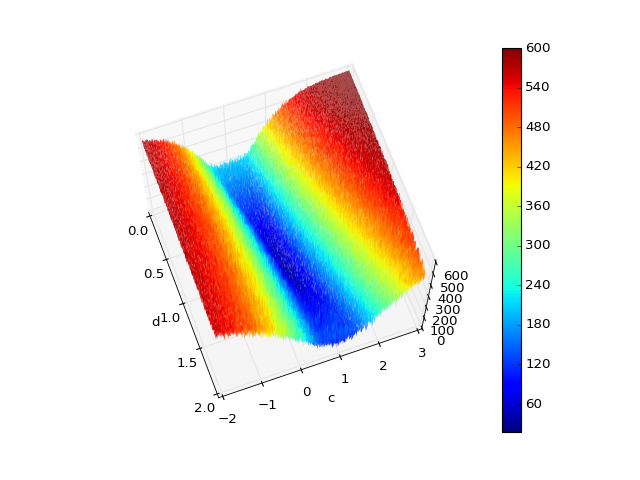

In [29]:
p=np.array(distance['sum']).reshape(len(c),len(d))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(D,C,p,rstride=1, cstride=1, cmap=cm.jet, linewidth=0)
plt.xlabel('d');plt.ylabel('c')
azm=ax.azim
ax.view_init(elev=70, azim=len(c)+len(d))
fig.colorbar(surf)

<IPython.core.display.Javascript object>


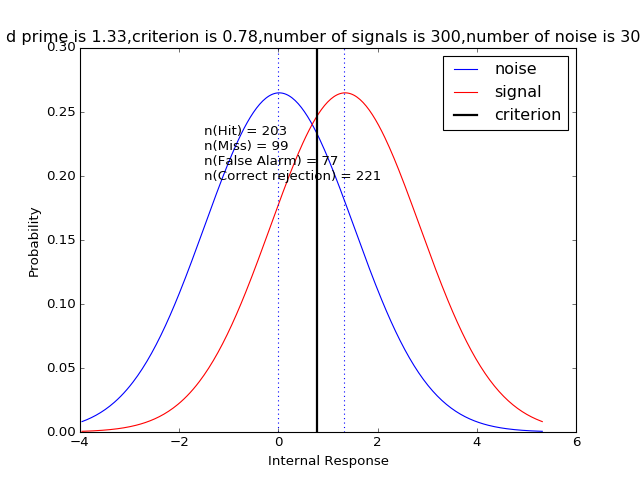

<IPython.core.display.Javascript object>


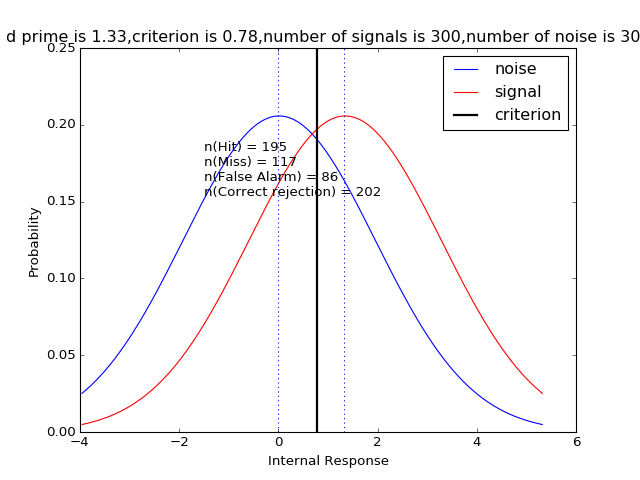

<IPython.core.display.Javascript object>


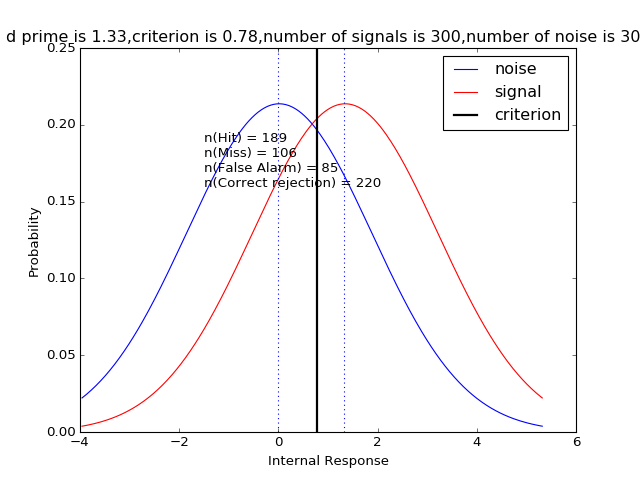

<IPython.core.display.Javascript object>


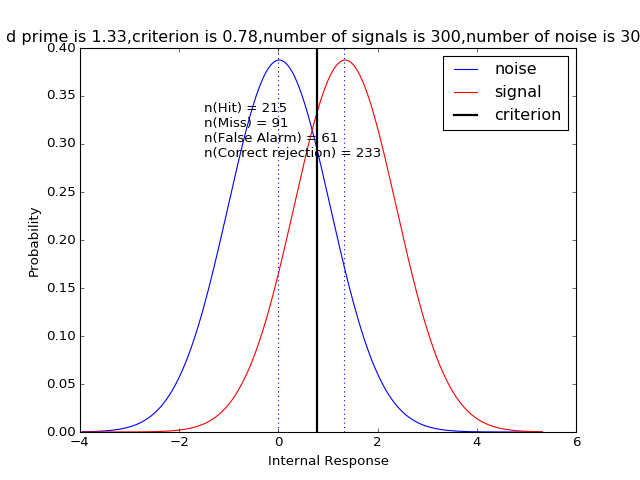

In [13]:
idxD = np.arange(len(D)*len(D[0])).reshape(D.shape)
optimalDprimg, optimalc = D[np.where(idxD == idxminimun)],C[np.where(idxD == idxminimun)]

# generate 4 more time:
for ds, cs in zip(optimalDprimg, optimalc):
    nHit, nMiss, nFA, nCR=SDTgen(ds,cs,300,300)
    nHit, nMiss, nFA, nCR=SDTgen(ds,cs,300,300)
    nHit, nMiss, nFA, nCR=SDTgen(ds,cs,300,300)
    nHit, nMiss, nFA, nCR=SDTgen(ds,cs,300,300)

# Q3 - Discussion2
As the four graphs and the texts on the graphs show that when d = 0.95 and c = 0.50, my generator have the result of [nHit, nMiss, nFA, nCR] close to [200,100,100,200] the most. 

I set the range of d as [0:0.05:2] and c as [-1:0.05:3]. By running the SDTgen using each pair of d and c in corresponding range, I could generate a list of [nHit, nMiss, nFA, nCR]. The second step will be find the distance from [nHit, nMiss, nFA, nCR] to [200,100,100,200] by subtract one from another. 

The minimum distance is very easy to find. Using the result of what d and c are, I put them back to the SDTgen to run anthoer 4 simulations to validate my result. 

Sometimes, my code gives me several minimun distance. I think that means I could make my step size smaller to find the "better" global minimum. As my graphs show, the local minimum of d and c are good enough. 

# Q4 -  Exponential

# Matlab Code - Q4
function X = myexp(lambda,M,N)
    
    % make exponential random variables
    % use the quantile function ( inverse CDF) method 

    U = rand(M,N);
    X = -log(1-U)./(lambda);

    %plot(sort(X(:)),sort(U(:)));hold on
    %plot(1,0.5,'r*');hold on

In [14]:
def myexp(lamda,M,N):
    """mean = 1/lamda"""
    U = np.random.rand(M,N)
    X = -np.log(1-U) / lamda
    return X

# Q4 Discussion

As the figure showed below, the function parameter $\lambda$ is set to be 1, which means that the mean is 1/1 = 1. By looking the histogram, the corresponding verticle value of 1 is almost the middle between the maximum frequency and 0. Mathematically speaking, that is where we find the mean for an exponential distibution. Out simulation shows this is a good approximation of exponential distribution. 

<IPython.core.display.Javascript object>


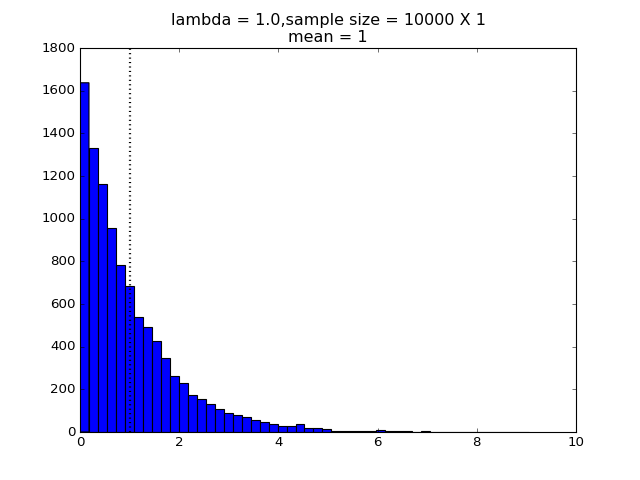

In [16]:
X = myexp(1,10000,1)
plt.figure()
_=plt.hist(X,bins=50)
plt.axvline(1,color='black',lw = 2, linestyle = ':')
sentence = 'lambda = %1.1f,sample size = %d X %d\nmean = %d' % (1,10000,1,1)
plt.title(sentence)
plt.show()

# Q5 - Correlated Bivariate Gaussian RVs

# Matlab Code - Q5
function [X,Y]= bivGauss(rho, sigmaX, sigmaY,n,m)

    %  generates two m x n matrices X,Y such that the corresponding entries in
    % X are  Gaussian random variables with mean 0, standard deviation sigmaX,
    % the entries in Y are also Gaussian random variables with mean 0, standard
    %deviation sigmaY, and corresponding entries in X and Y are correlated with
    % expected correlation rho. Show how your function works by generating
    % large samples and computing the standard deviations and correlation using
    % Matlab’s standard functions.
    MeanX = 0;
    MeanY = 0;


    u = randn(m,n);
    v = randn(m,n);

    X = MeanX + sigmaX * u;
    Y = MeanY + sigmaY * (rho*u + sqrt(1-rho^2)*v);

In [17]:
def bivGauss(rho,sigmaX,sigmaY,n,m):
    MeanX = 0
    MeanY = 0
    
    u = np.random.randn(m,n)
    v = np.random.randn(m,n)
    
    X = MeanX + sigmaX* u
    
    Y = MeanY + sigmaY* (rho*u + np.sqrt(1-rho**2)*v)
    
    return X,Y

# Q5 - Discussion

As showed below, both X and Y center at zero and have different standard deviation ($\sigma$). By adding norm noise with corresponding $\sigma$ to X, we can generate X. However, to have expected corrrelated random variables of Y, we need to calculate the covariance between X and Y in terms of $\rho$. Since $\rho$ is given, we add certain shape of noise to Y: r * u + $\sqrt(1-r^2)$ * v, where u and v are norm(0,1) random variables. 

As simulation shows, in a 1000-time simulation, we have distribution of $\sigma$ of X center at the expected sigmaX, distribution of $\sigma$ of Y center at the expected sigmaY, and distribution of correlation coefficients center at the expected $\rho$. 

I also want to point out one thing that in the title of the 3rd graph, variances of X and Y are showed instead of $\sigma$s, but we all know that $\sigma^2$ is the variance. 

<IPython.core.display.Javascript object>


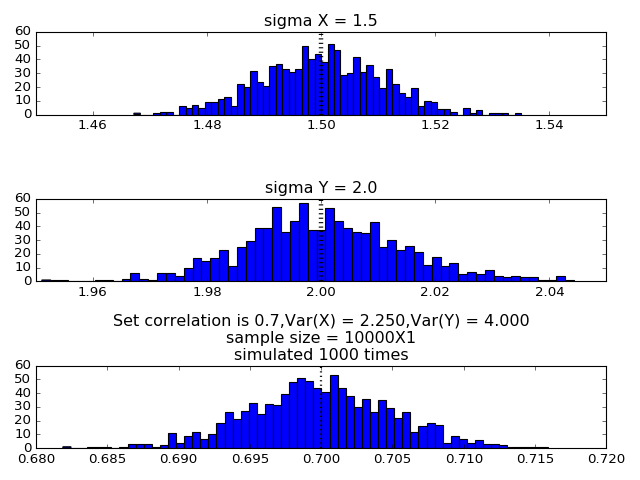

In [18]:
rho=0.7;sigmaX=1.5;sigmaY=2;m=10000;n=1
r=[];var_X=[];var_Y=[]
for i in range(1000):
    X,Y = bivGauss(rho,sigmaX,sigmaY,m,n)
    r.append(np.corrcoef(X,Y)[0][1])
    var_X.append(np.var(X))
    var_Y.append(np.var(Y))
plt.figure()
plt.subplot(3,1,1)
_=plt.hist(np.sqrt(var_X),bins=60)
plt.axvline(sigmaX,color='black',lw=4,linestyle=":")
plt.xlim([sigmaX-0.05,sigmaX+0.05])
plt.title('sigma X = %1.1f' % sigmaX)
plt.subplot(3,1,2)
_=plt.hist(np.sqrt(var_Y),bins=60)
plt.axvline(sigmaY,color='black',lw=4,linestyle=":")
plt.xlim([sigmaY-0.05,sigmaY+0.05])
plt.title('sigma Y = %1.1f' % sigmaY)
plt.subplot(3,1,3)
_=plt.hist(r,bins=60)
plt.axvline(rho, color='black', lw=2, linestyle=':')
sentence = 'Set correlation is %1.1f,Var(X) = %1.3f,Var(Y) = %1.3f\nsample size = %dX%d\nsimulated %d times' % (rho,sigmaX**2,sigmaY**2,m,n,1000)
plt.title(sentence)
plt.xlim([rho-0.02,rho+0.02])
plt.tight_layout()